In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('heart_2022_no_nans.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# Check for missing values
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [5]:
# Get information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
# Descriptive statistics of numeric columns
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [7]:
# Get a list of column names
columns = data.columns.tolist()
columns

['State',
 'Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'SleepHours',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

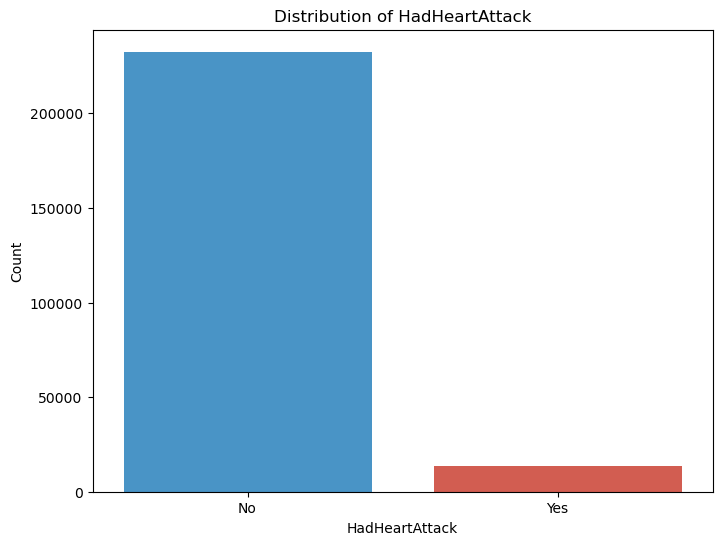

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ["#3498db", "#e74c3c"]

# Create a custom bar chart with the color palette
plt.figure(figsize=(8, 6))
sns.countplot(x='HadHeartAttack', data=data, palette=colors)

# Add labels and title
plt.title('Distribution of HadHeartAttack')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')

# Show the chart
plt.show()

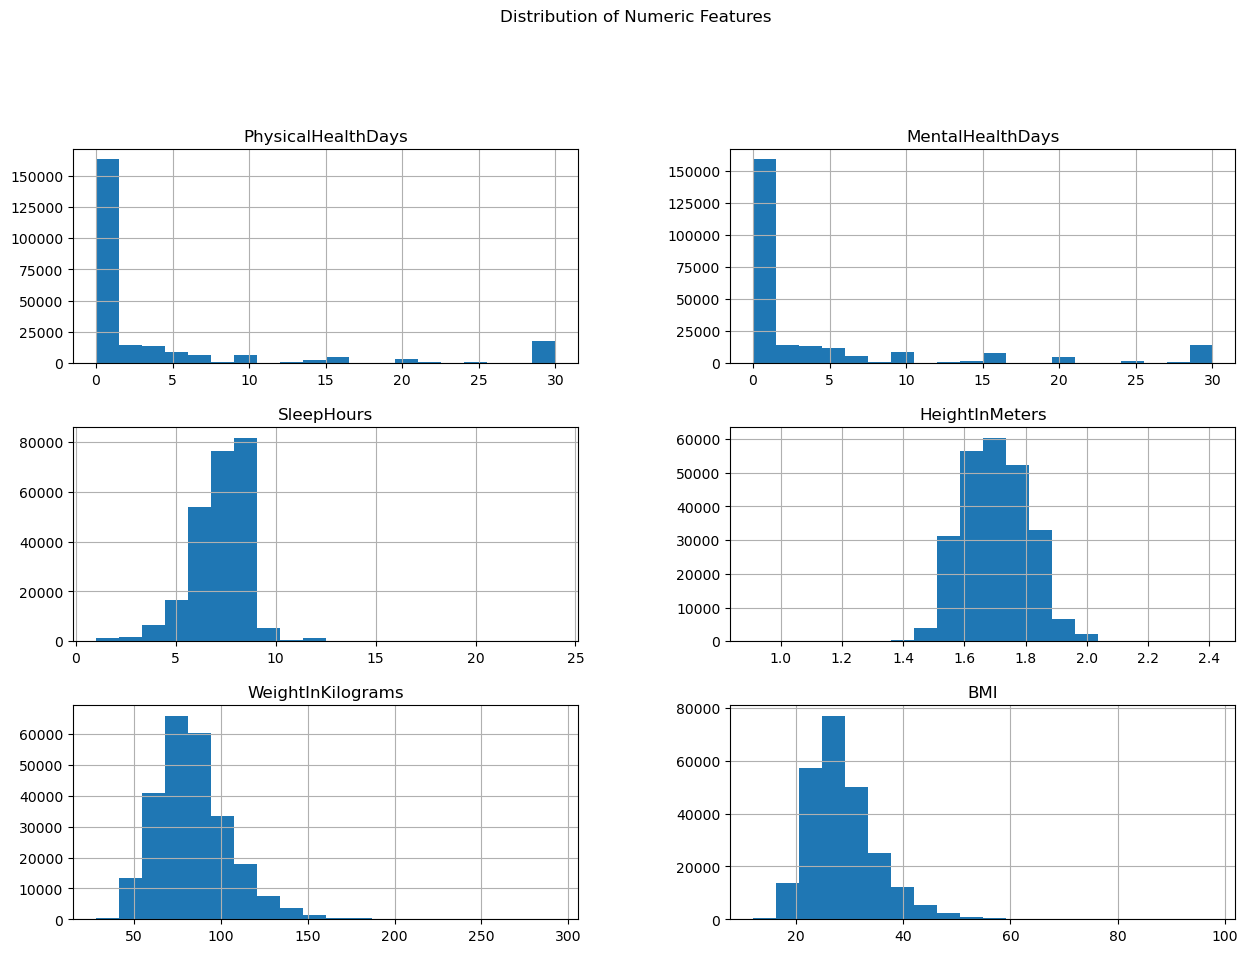

In [9]:
# Visualize the characteristics of the dataset
# Plot the distribution of some numeric columns
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
data[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.show()

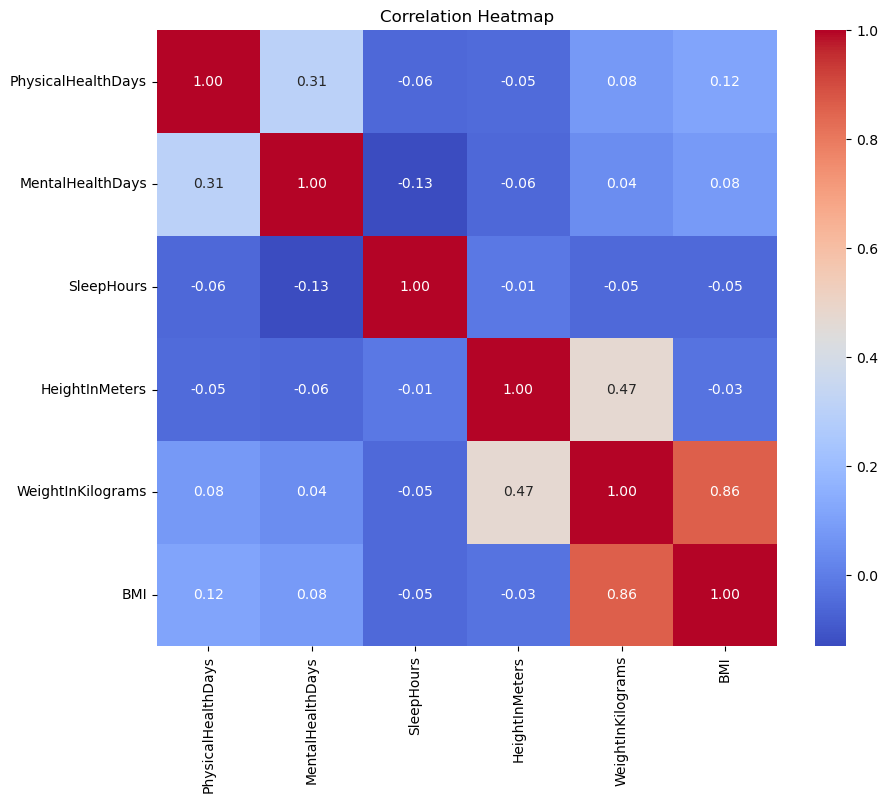

In [10]:
# Create a heatmap to visualize the correlation between numeric columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

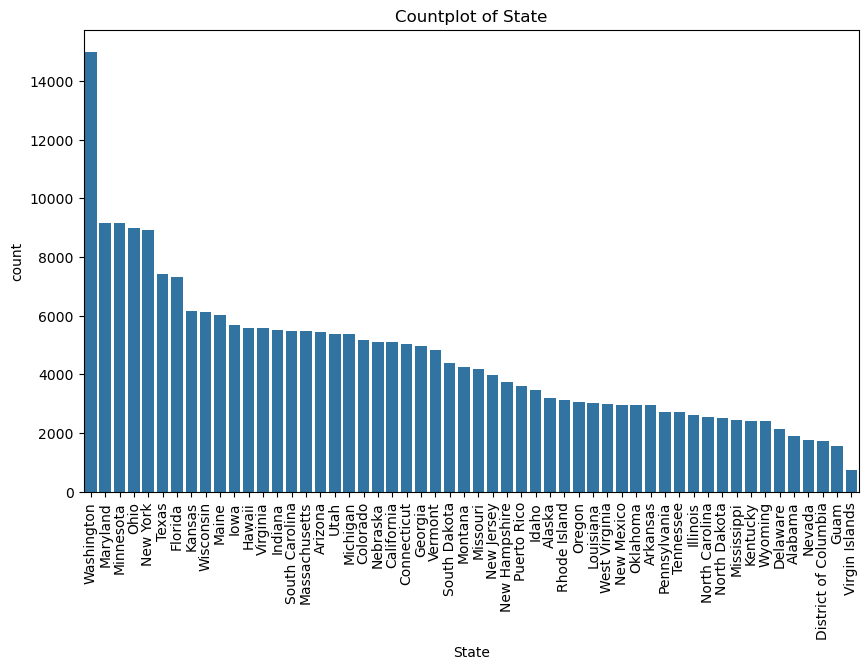

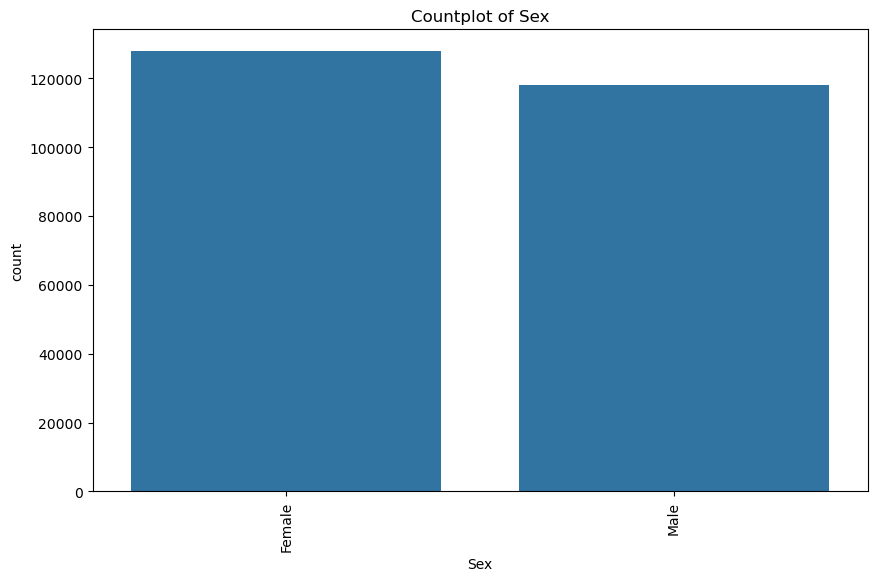

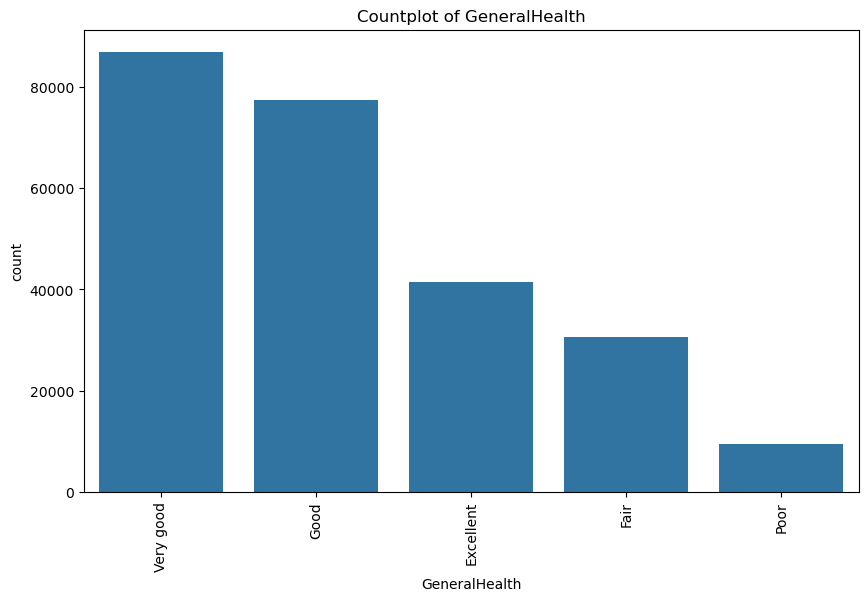

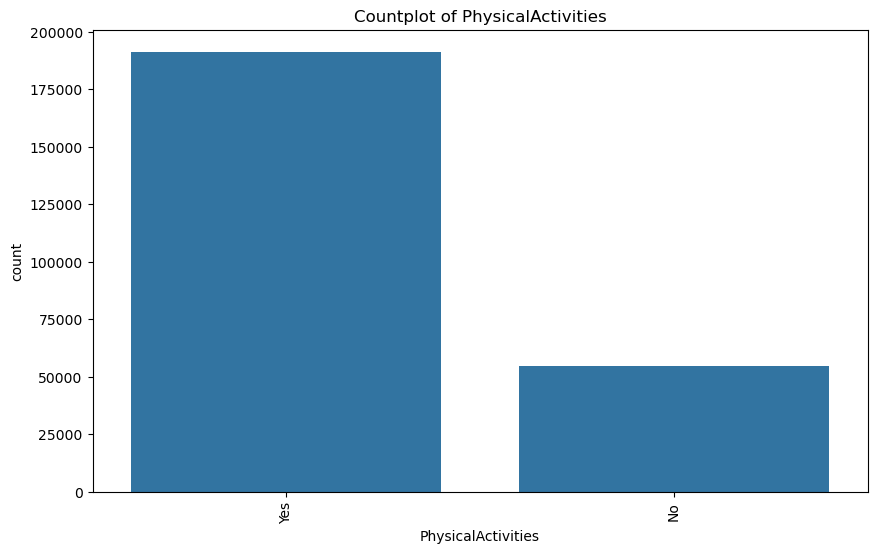

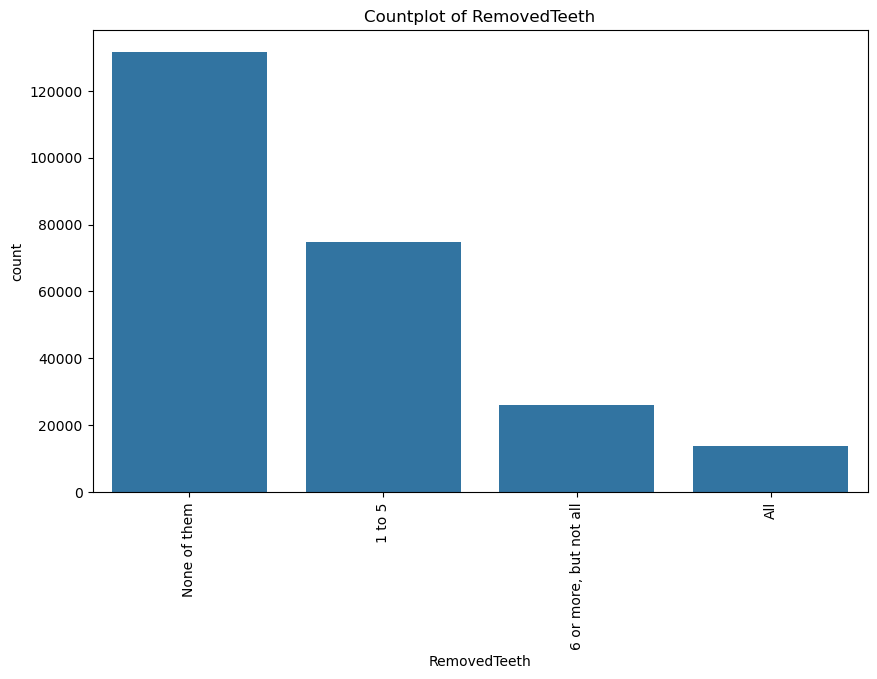

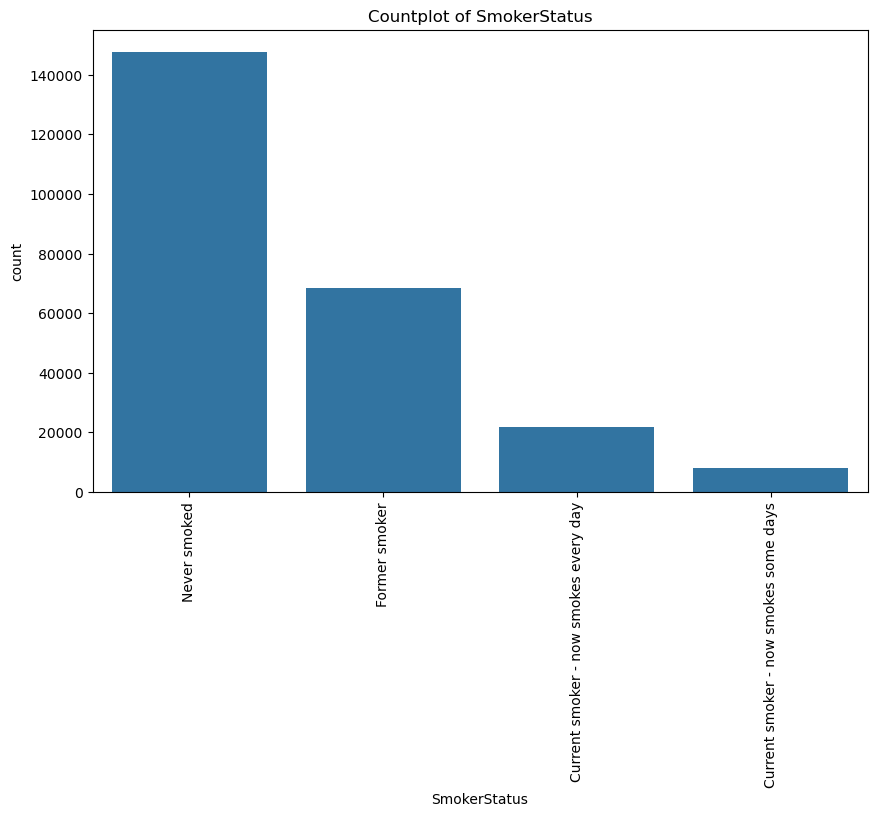

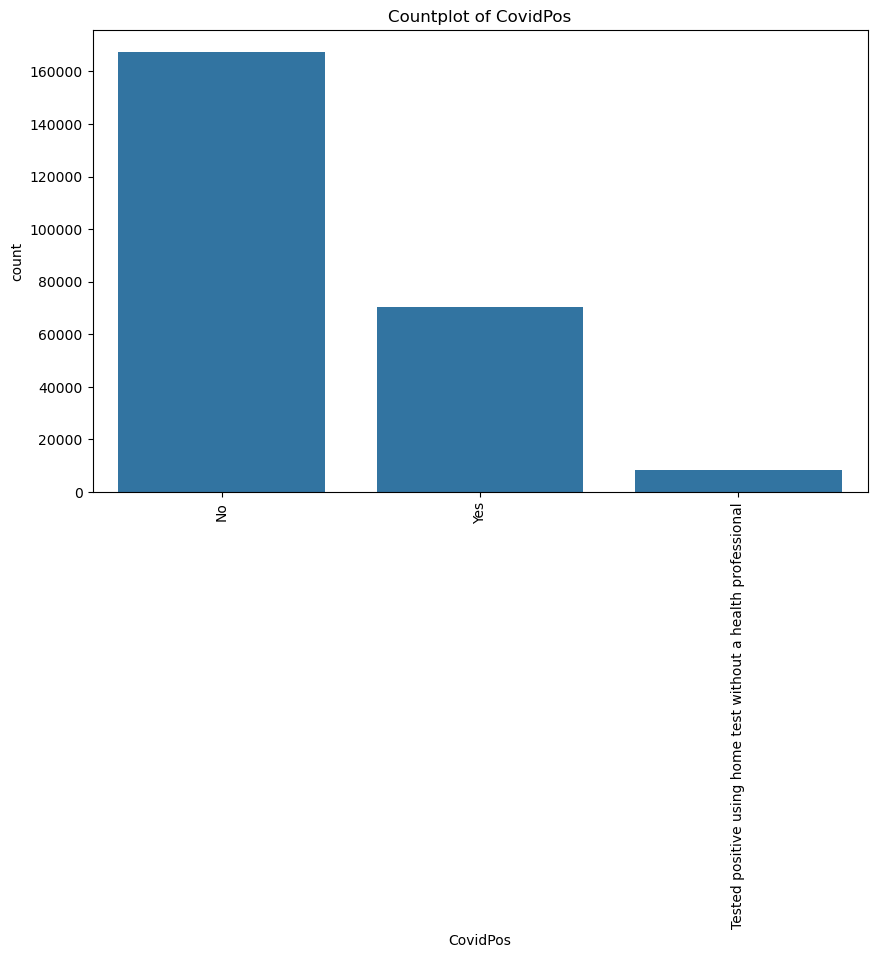

In [11]:
categorical_columns = ['State', 'Sex', 'GeneralHealth', 'PhysicalActivities', 'RemovedTeeth', 'SmokerStatus', 'CovidPos']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f"Countplot of {column}")
    plt.xticks(rotation=90)
    plt.show()

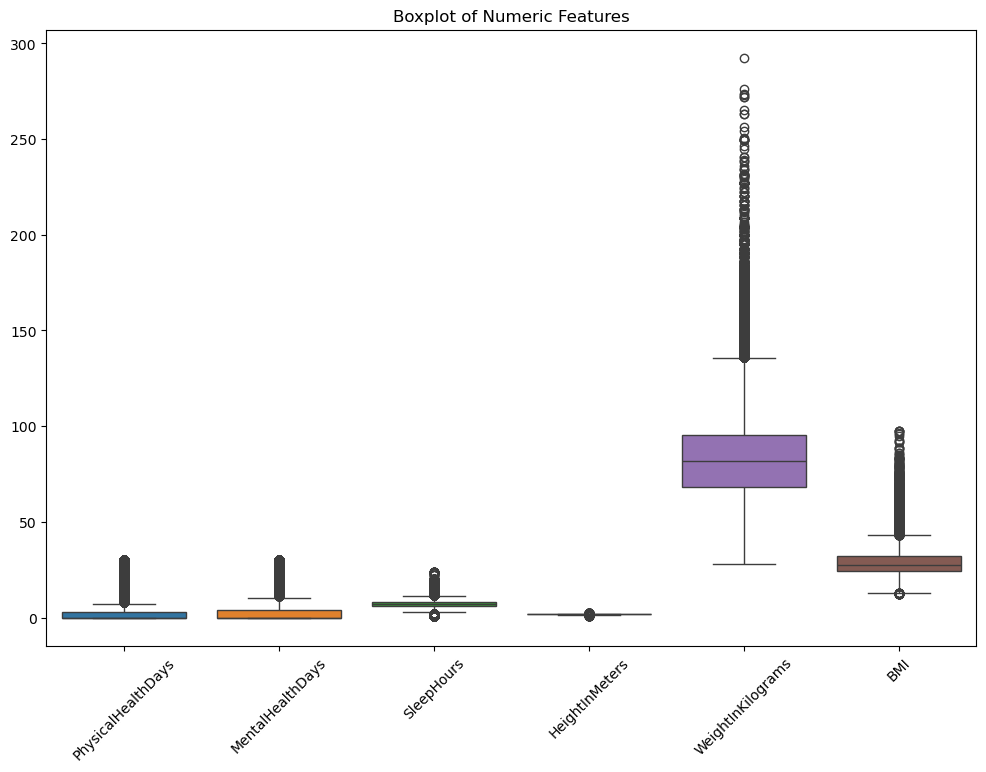

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()


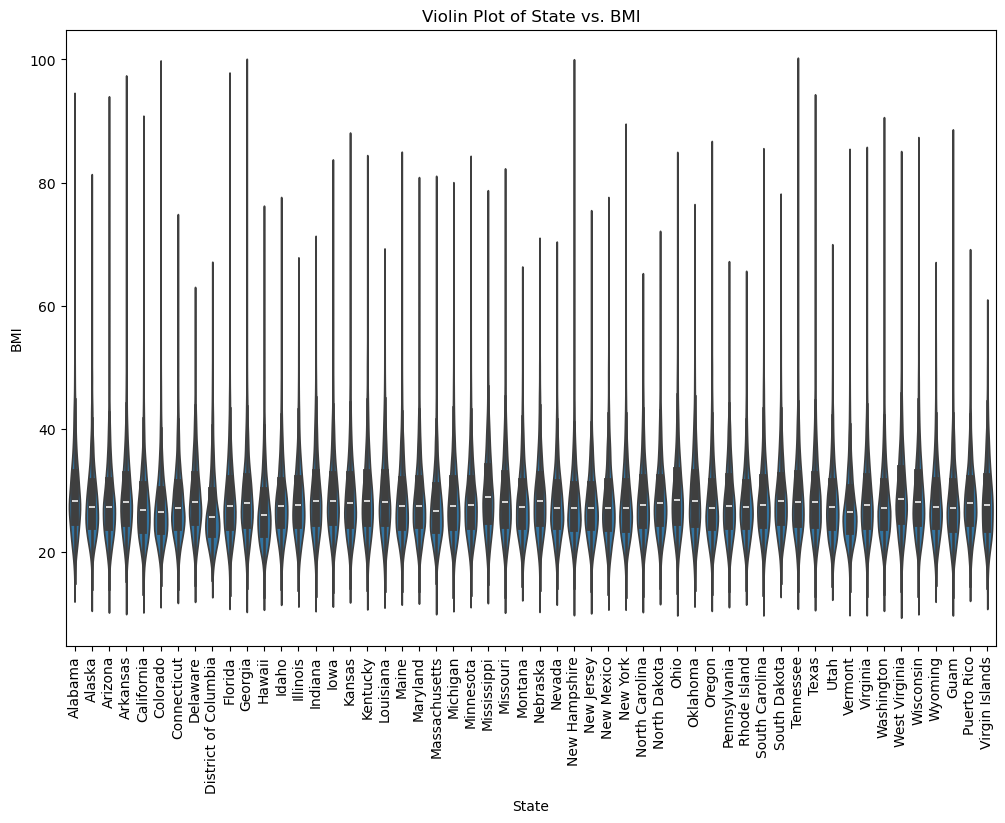

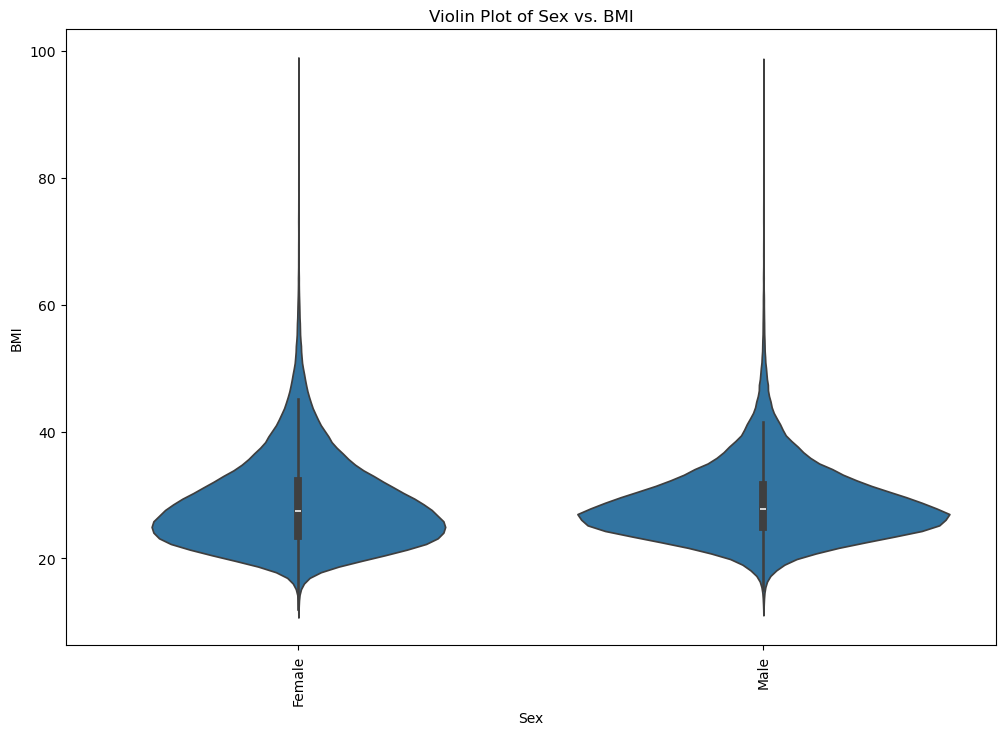

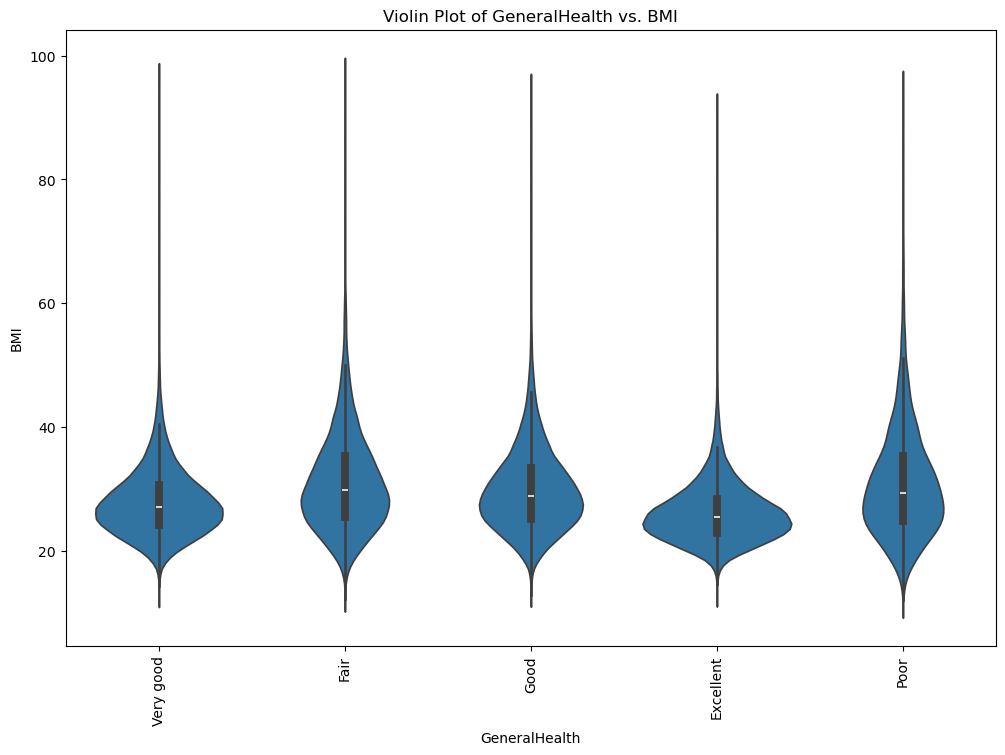

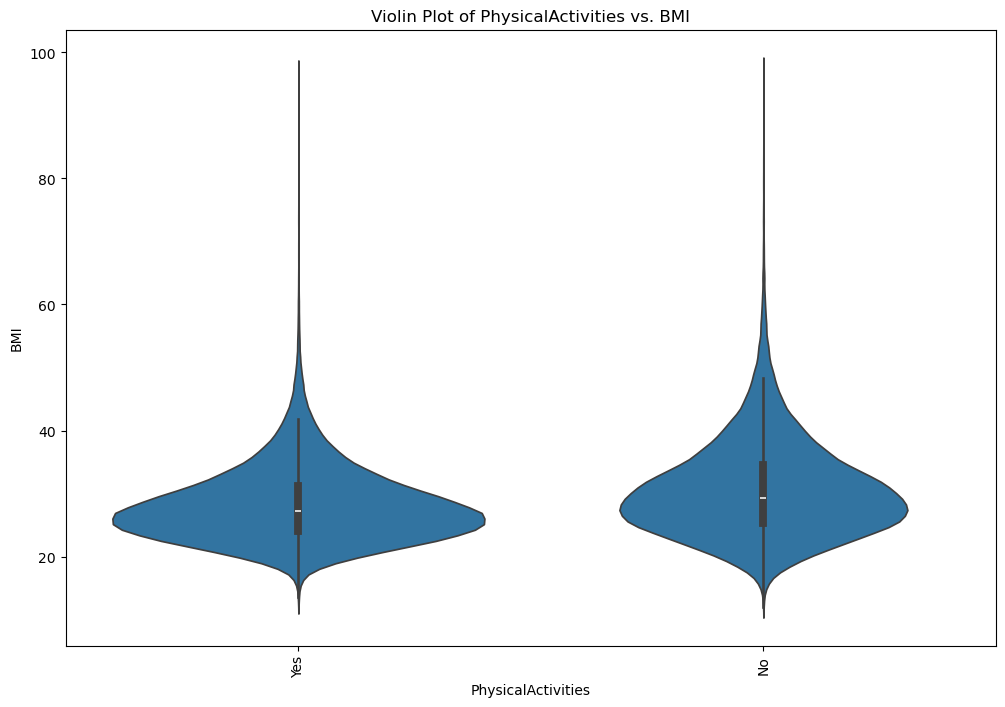

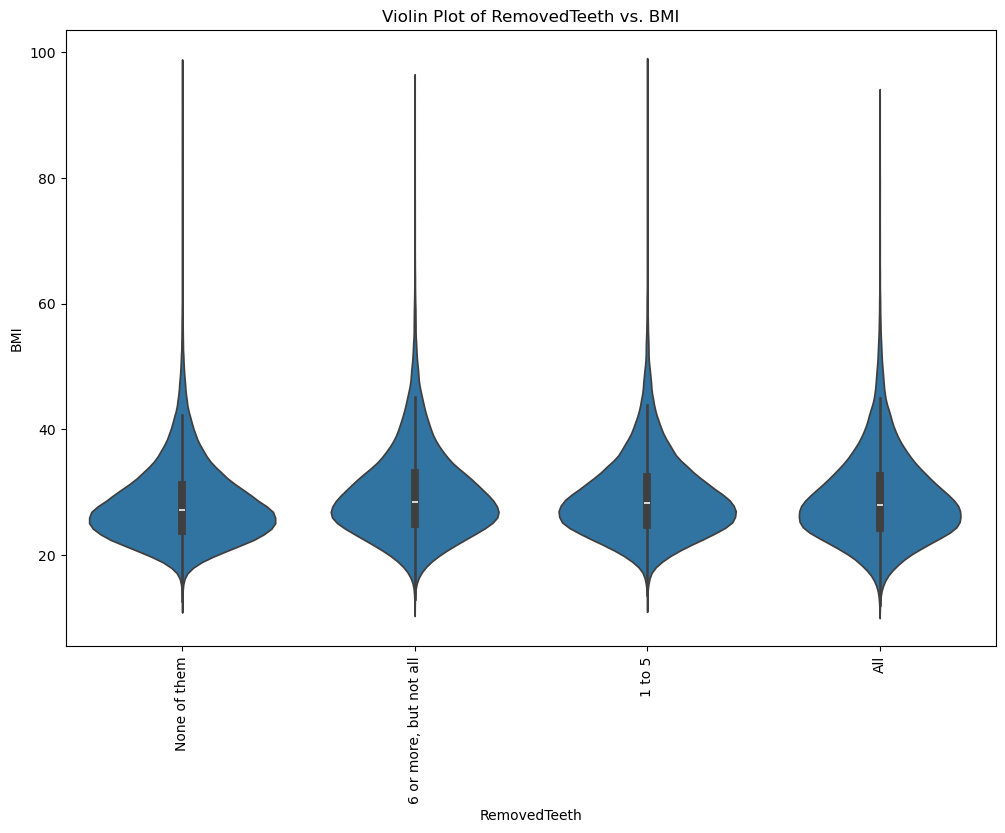

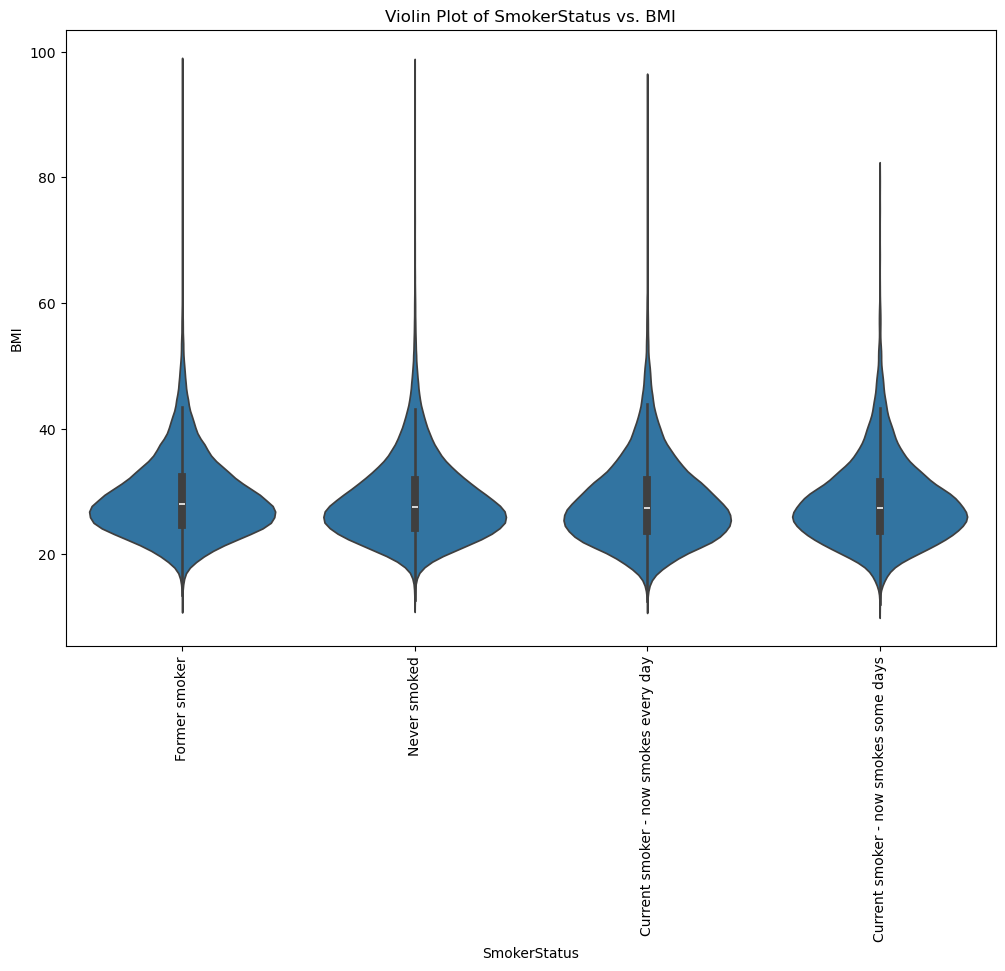

In [13]:
for column in categorical_columns:
    if column != 'CovidPos':
        plt.figure(figsize=(12, 8))
        sns.violinplot(data=data, x=column, y='BMI')
        plt.title(f"Violin Plot of {column} vs. BMI")
        plt.xticks(rotation=90)
        plt.show()


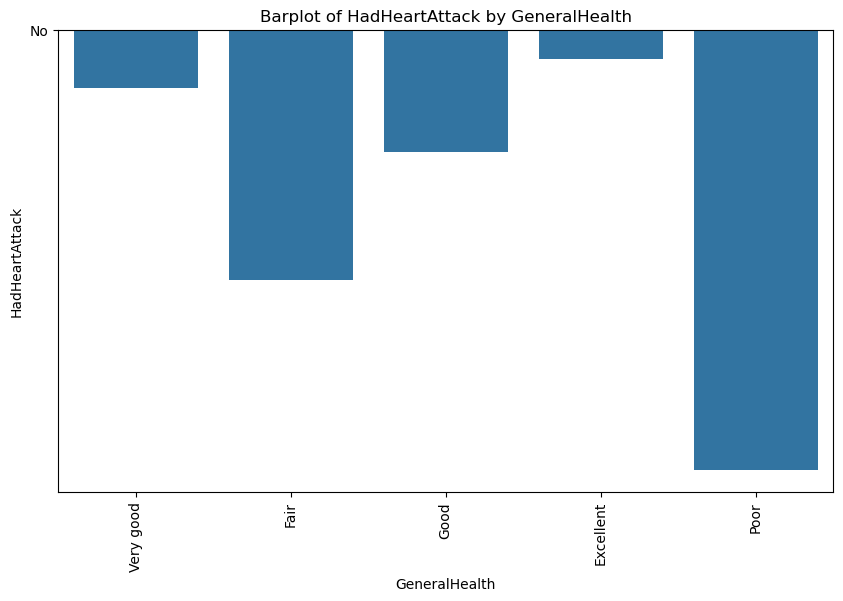

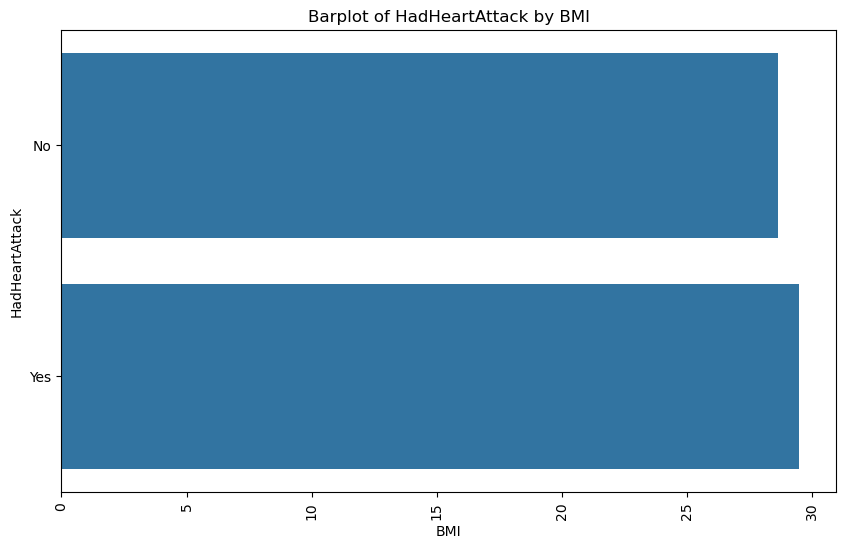

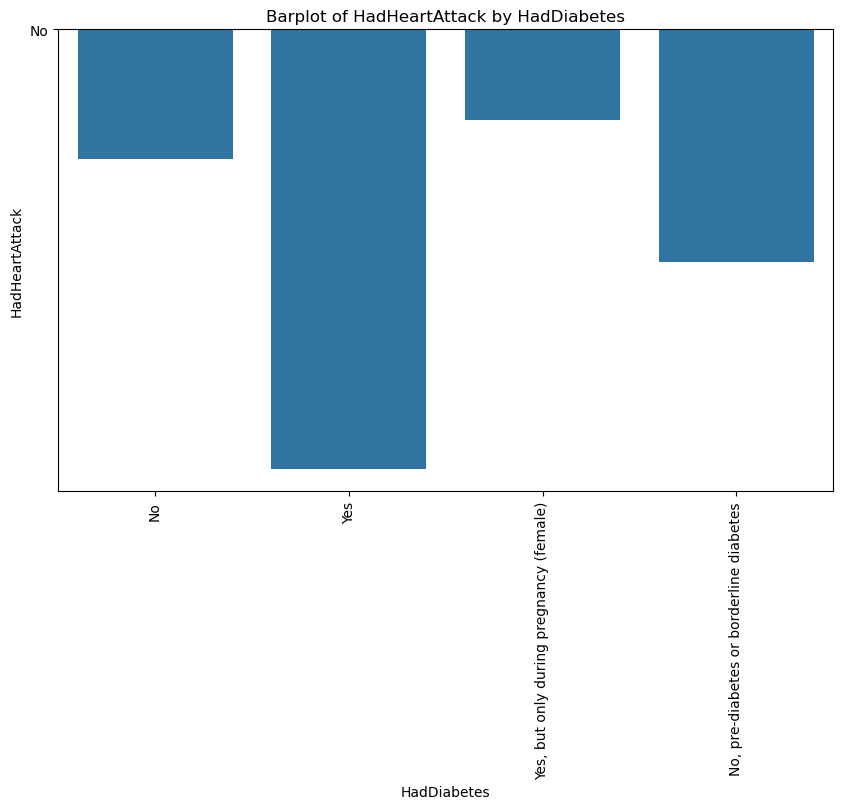

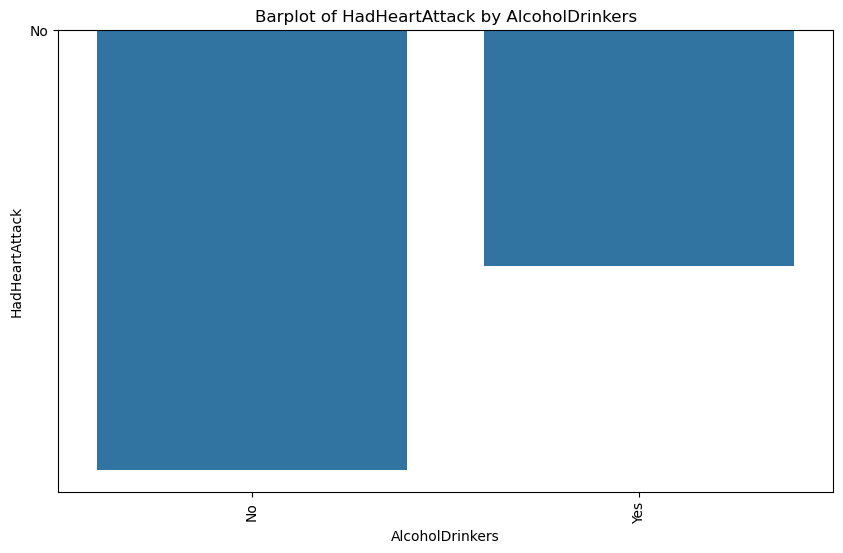

In [14]:
summary_columns = ['GeneralHealth', 'BMI', 'HadDiabetes', 'AlcoholDrinkers']
for column in summary_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=column, y='HadHeartAttack', ci=None)
    plt.title(f"Barplot of HadHeartAttack by {column}")
    plt.xticks(rotation=90)
    plt.show()


In [15]:
# Encoding categorical columns
le = LabelEncoder()
object_columns = data.select_dtypes(include=['object']).columns.tolist()
data[object_columns] = data[object_columns].apply(lambda col: le.fit_transform(col))

In [16]:
# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('HadHeartAttack', axis=1))

In [17]:
# Function to evaluate models
def evaluate_models(X, y):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('XGBoost', XGBClassifier())
    ]

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((name, accuracy, precision, recall, f1))

    result_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    display(result_df)

In [18]:
# Evaluate models
evaluate_models(X, data['HadHeartAttack'])

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.948298,0.537543,0.239362,0.331230
1,Decision Tree,0.914541,0.250397,0.299772,0.272869
2,Random Forest,0.948664,0.571237,0.161474,0.251777
3,XGBoost,0.948440,0.539683,0.245441,0.337425


In [19]:
# Random undersampling
rus = RandomUnderSampler(random_state=42)
X_unsampled, y_unsampled = rus.fit_resample(X, data['HadHeartAttack'])
display("Random Undersampling Results:")
evaluate_models(X_unsampled, y_unsampled)

'Random Undersampling Results:'

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.800335,0.817929,0.770553,0.793535
1,Decision Tree,0.727019,0.726489,0.724589,0.725538
2,Random Forest,0.799777,0.801887,0.794096,0.797972
3,XGBoost,0.794939,0.792131,0.797459,0.794786


In [20]:
# Random oversampling
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, data['HadHeartAttack'])
display("Random Oversampling Results:")
evaluate_models(X_oversampled, y_oversampled)

'Random Oversampling Results:'

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.801075,0.821917,0.767966,0.794026
1,Decision Tree,0.974332,0.951104,1.000000,0.974939
2,Random Forest,0.990208,0.980765,1.000000,0.990289
3,XGBoost,0.859429,0.853218,0.867729,0.860412


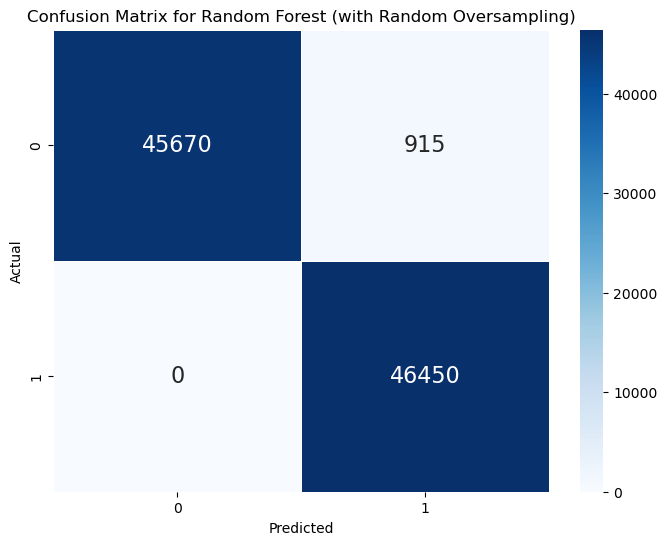

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (with Random Oversampling)')
plt.show()


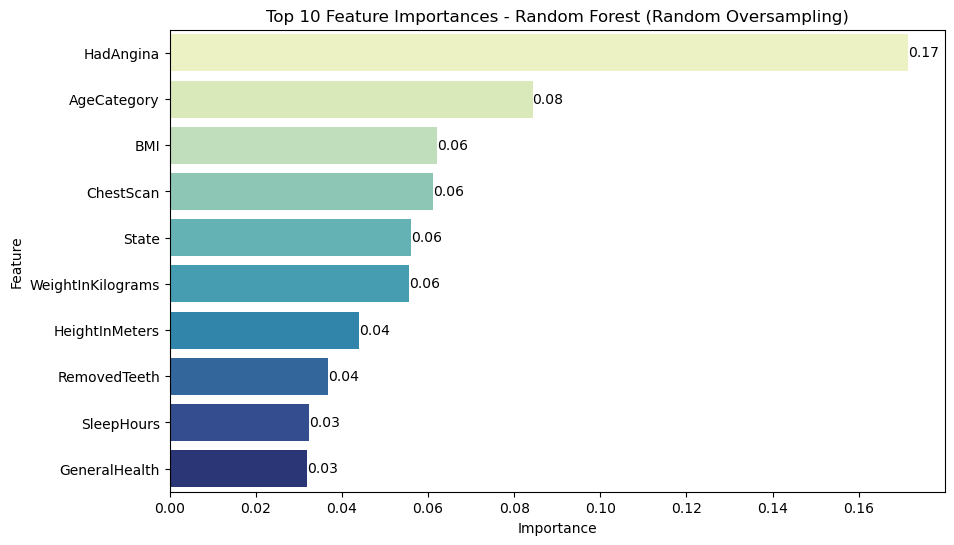

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un modelo Random Forest con Random Oversampling
best_model = RandomForestClassifier()
best_model.fit(X_oversampled, y_oversampled)

# Obtener las importancias de las características del modelo
feature_importances = best_model.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características junto con los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': data.drop('HadHeartAttack', axis=1).columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tomar las 10 características más importantes
top_10_features = feature_importance_df.head(10)

# Crear una paleta de colores en escala
color_palette = sns.color_palette("YlGnBu", n_colors=len(top_10_features))

# Visualizar las 10 características más importantes con colores en escala
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Importance', y='Feature', data=top_10_features, orient='h', palette=color_palette)
plt.title('Top 10 Feature Importances - Random Forest (Random Oversampling)')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Agregar una barra de colores que refleje la importancia
for index, value in enumerate(top_10_features['Importance']):
    barplot.text(value, index, f'{value:.2f}', va='center')

plt.show()


